## Statistics Assignment

All of the following are based on data from your project. Each student has to perform analysis on their own no collaboration between team members. Here are the datasets to be analyzed by team datasets:

***
### ***For Part 1 and 2***

##### Toxic-Crusaders
* Chemical Industry Release (pick a particular industry) by Date-Time

### Part 1

* **Conduct Decriptive Analytics (Mean, Median, Quartile) calculation by each division of Date-Time (most probably year or 6 month duration, if you have shorter use 1 month)**
* **Calculate divergence of mean and median in your data**
* **Visualize the data and draw inferences**

### Part 2
* **Conduct Probablity distibution analysis based on the data. Analyze your data based on the type of distribution it best fits (for PDF and CDF)**
* **Conduct Method of Moments analysis on your data to suggest the best fit distribution. Visualize the results**

***
***

### ***For Part 3***
* Compare with the variable with other variables in your project

### Part 3
* **Formulate a null hypothesis and evaluate it, perform correlation measures, and construct a linear regression model**

***

## Part 1

The Toxics Release Inventory data that I will be using for this assignment are the CSV files for each year from 1987 to 2016. We have a variety of attributes in these data sets, which have already been cleaned and organized by a script I've written for our group project. Of these variables, in the current assignment, we will look at total chemical releases by industry sector for each year in the data.

Since we are only interested in the year, industy sector, and total releases, let's use a script to trim down the data. This script a modified version of the tool we used for general data-cleaning from the raw TRI sets, and is run from the command line and accepts our already-cleaned TRI csv files. Since, in Part 3 of this assignment, we'll need another variable to correlate and test with, I've combined on-site and off-site recycling amounts to make RECYCLED_TOTAL, which will be compared to the TOTAL_RELEASES.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [22]:
#start by analyzing 2016 data
us2016 = pd.read_csv('./A4_TRI_Data/A4_TRI_2016_US.csv').drop('Unnamed: 0', axis=1)[['YEAR','TOTAL_RELEASES']]
#trim out extreme outliers -3/+3 standard deviations out
us2016 = us2016[np.abs(us2016.TOTAL_RELEASES-us2016.TOTAL_RELEASES.mean())<=(3*us2016.TOTAL_RELEASES.std())]

0.00000000000000000000000000000000000000000000000000000000000000
16 values > 3 standard deviations from the mean.
      YEAR  TOTAL_RELEASES
0     2016    4.104990e+05
4     2016    5.876303e+05
28    2016    5.578852e+05
189   2016    3.420000e+05
294   2016    3.902190e+05
639   2016    3.477849e+06
649   2016    3.500850e+05
1158  2016    1.358851e+06
1411  2016    9.301087e+05
1494  2016    3.181590e+05
1557  2016    6.159850e+05
1597  2016    4.841280e+05
1822  2016    3.386960e+05
2029  2016    2.131000e+06
2081  2016    4.569680e+05
2145  2016    4.177700e+05


### Total Releases, Mean and Median

In [3]:
us2016releases = us2016.TOTAL_RELEASES
print '2016 total release value: %.2f' % us2016releases.sum()
print '2016 mean release value: %.2f' % us2016releases.mean()
print '2016 median release value: %.2f' % us2016releases.median()

2016 total release value: 26542364.23
2016 mean release value: 11333.20
2016 median release value: 616.95


#### Mean is much higher than the median

We notice right away, for the year 2016, that the mean is much higher than the median value. This means that, for this year at least, the data is heavily positively skewed. This will likely be apparent when we graph the data for this year.

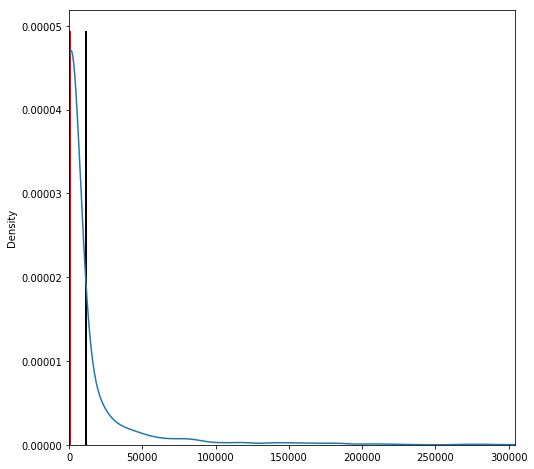

In [128]:
us2016releases.plot(kind="kde", figsize=(8,8), xlim=(0,us2016releases.max()))
ymax = max(plt.gca().get_ylim())
plt.vlines(us2016releases.mean(),
           ymin=0, 
           ymax=ymax,
           linewidth=2.0)

plt.vlines(us2016releases.median(),
           ymin=0, 
           ymax=ymax,
           linewidth=2.0,
           color='red')


plt.gca().set_ylim(0)
plt.show()

### Outliers are having a huge impact

Positively skewed, indeed! The median value, being a 'robust' statistic, as we've talked about, is important in this context, because it's small value (644.26 pounds of total releases) indicate that there are a lot of zero and near-zero values in the data, and the massive spread is likely caused by some extreme outliers.

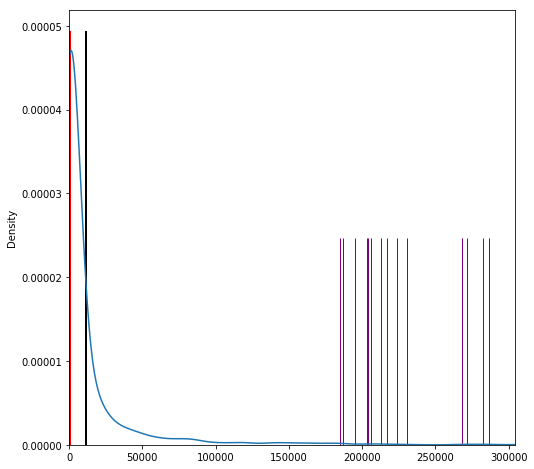

In [129]:
#looking at the top 15 contributors for 2016 total releases
top = [x for x in us2016releases.sort_values(ascending=False)[0:15]]

us2016releases.plot(kind="kde", figsize=(8,8), xlim=(0,us2016releases.max()))
ymax = max(plt.gca().get_ylim())
plt.vlines(us2016releases.mean(),
           ymin=0, 
           ymax=ymax,
           linewidth=2.0)

plt.vlines(us2016releases.median(),
           ymin=0, 
           ymax=ymax,
           linewidth=2.0,
           color='red')

for i in range(len(top)):
    plt.vlines(top[i],
           ymin=0, 
           ymax=ymax/2,
           linewidth=1.0,
           color='purple')


plt.gca().set_ylim(0)
plt.show()

As we can see above, the top 15 releasing facilities are contributing a massively disproportionate amount of toxic release (we've already trimmed out the extreme outliers). The difference in the median and mean can't even be seen at this scale, and both are effectively zero compared to the highest-releasing facilities.

### Quartiles

In [130]:
quartiles = [us2016releases.quantile(0),   
             us2016releases.quantile(0.25),
             us2016releases.quantile(0.50),
             us2016releases.quantile(0.75),
             us2016releases.quantile(1)]

quartiles

[0.0, 2.4120999999999997, 616.95, 7536.5625, 304585.0]

Our quartiles again highlight the impact of our several high outliers. In this case, a more revealing statistic related to the quartiles would be the Interquartile Range.

In [131]:
iqr = us2016releases.quantile(0.75) - us2016releases.quantile(0.25)
print "2016 Interquartile Range: %2f" % iqr

2016 Interquartile Range: 7534.150400


While the IQR gives a better idea of where most of the data sits, we've seen from our median that a lot of our data is nearly zero, so this stat is also heavily affected by the outliers.

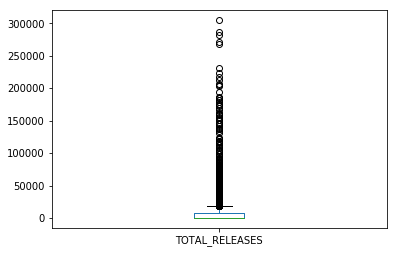

In [132]:
#as expeceted, this looks ridiculous
us2016releases.plot(kind="box")
plt.show()

In [133]:
#not that we even needed to check at this point, but the skew and kurtosis are both very highly positive
print '2016 Skew Value: %.2f' % us2016releases.skew()
print '2016 Kurtosis Value: %.2f' % us2016releases.kurtosis()

2016 Skew Value: 4.77
2016 Kurtosis Value: 27.89




-------------------- 1987 Basic Stats Summary --------------------
1987 total release value: 175193760.90
1987 mean release value: 57934.44
1987 median release value: 10391.50
1987 release variance: 28918888202.51
1987 Skew Value: 6.11
1987 Kurtosis Value: 45.09


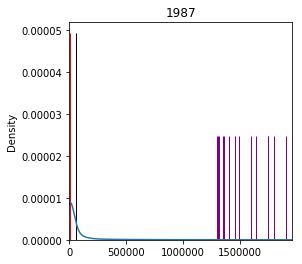



-------------------- 1988 Basic Stats Summary --------------------
1988 total release value: 131435419.76
1988 mean release value: 37107.68
1988 median release value: 9041.50
1988 release variance: 7574934921.55
1988 Skew Value: 4.60
1988 Kurtosis Value: 25.12


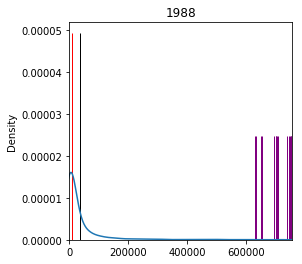



-------------------- 1989 Basic Stats Summary --------------------
1989 total release value: 136393934.36
1989 mean release value: 33553.24
1989 median release value: 7850.00
1989 release variance: 6818979613.31
1989 Skew Value: 5.10
1989 Kurtosis Value: 31.85


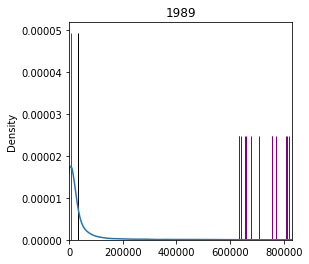



-------------------- 1990 Basic Stats Summary --------------------
1990 total release value: 125235007.32
1990 mean release value: 31044.87
1990 median release value: 6985.00
1990 release variance: 5359754666.68
1990 Skew Value: 4.52
1990 Kurtosis Value: 23.52


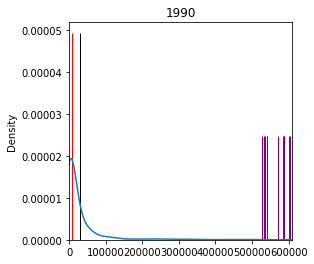



-------------------- 1991 Basic Stats Summary --------------------
1991 total release value: 108659613.50
1991 mean release value: 26088.74
1991 median release value: 5900.00
1991 release variance: 3525724944.26
1991 Skew Value: 4.45
1991 Kurtosis Value: 23.30


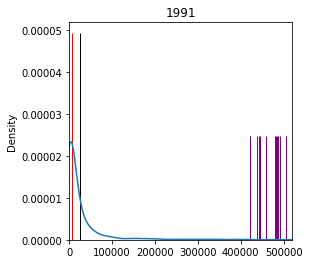



-------------------- 1992 Basic Stats Summary --------------------
1992 total release value: 95980978.92
1992 mean release value: 24109.77
1992 median release value: 5300.00
1992 release variance: 2879322751.72
1992 Skew Value: 4.33
1992 Kurtosis Value: 22.14


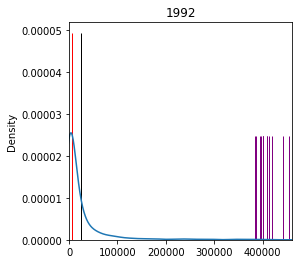



-------------------- 1993 Basic Stats Summary --------------------
1993 total release value: 90564841.14
1993 mean release value: 22829.55
1993 median release value: 4978.00
1993 release variance: 2590263619.82
1993 Skew Value: 4.63
1993 Kurtosis Value: 26.61


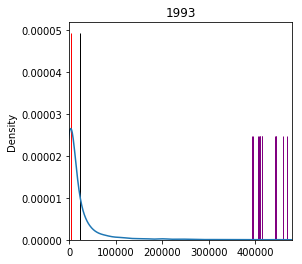



-------------------- 1994 Basic Stats Summary --------------------
1994 total release value: 81943104.72
1994 mean release value: 23030.66
1994 median release value: 4348.00
1994 release variance: 2925120292.06
1994 Skew Value: 4.71
1994 Kurtosis Value: 26.67


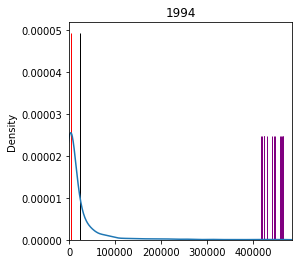



-------------------- 1995 Basic Stats Summary --------------------
1995 total release value: 80281889.18
1995 mean release value: 21809.80
1995 median release value: 3700.00
1995 release variance: 2574380911.74
1995 Skew Value: 4.74
1995 Kurtosis Value: 27.60


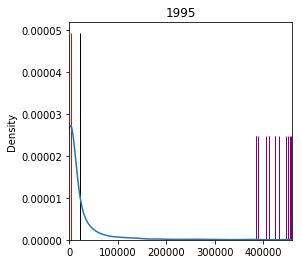



-------------------- 1996 Basic Stats Summary --------------------
1996 total release value: 75163325.18
1996 mean release value: 21347.15
1996 median release value: 3791.00
1996 release variance: 2505171299.76
1996 Skew Value: 4.85
1996 Kurtosis Value: 29.17


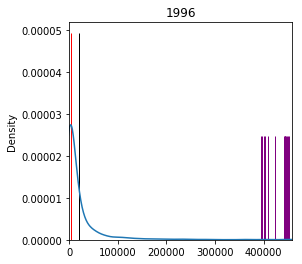



-------------------- 1997 Basic Stats Summary --------------------
1997 total release value: 74488774.96
1997 mean release value: 21441.79
1997 median release value: 3533.50
1997 release variance: 2635583516.03
1997 Skew Value: 4.79
1997 Kurtosis Value: 27.84


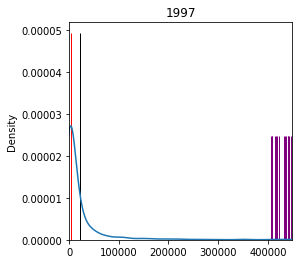



-------------------- 1998 Basic Stats Summary --------------------
1998 total release value: 75973431.03
1998 mean release value: 21577.23
1998 median release value: 3305.00
1998 release variance: 2815587143.03
1998 Skew Value: 4.99
1998 Kurtosis Value: 30.65


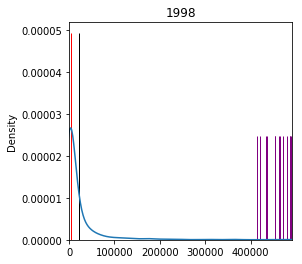



-------------------- 1999 Basic Stats Summary --------------------
1999 total release value: 72568517.14
1999 mean release value: 20739.79
1999 median release value: 3200.00
1999 release variance: 2309363791.56
1999 Skew Value: 4.44
1999 Kurtosis Value: 24.04


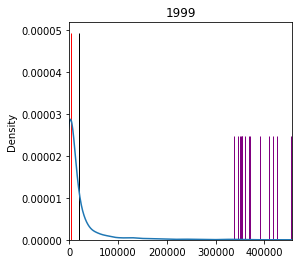



-------------------- 2000 Basic Stats Summary --------------------
2000 total release value: 66225234.12
2000 mean release value: 18133.96
2000 median release value: 2330.00
2000 release variance: 1740239579.44
2000 Skew Value: 4.57
2000 Kurtosis Value: 26.21


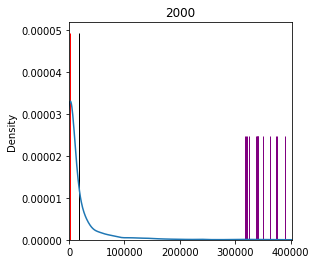



-------------------- 2001 Basic Stats Summary --------------------
2001 total release value: 54273576.32
2001 mean release value: 14672.50
2001 median release value: 1447.00
2001 release variance: 1113527386.82
2001 Skew Value: 4.20
2001 Kurtosis Value: 21.90


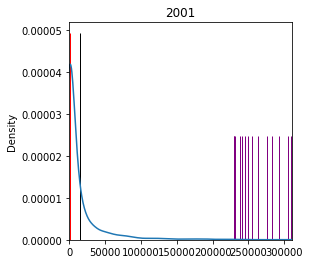



-------------------- 2002 Basic Stats Summary --------------------
2002 total release value: 52787577.15
2002 mean release value: 14462.35
2002 median release value: 1301.50
2002 release variance: 1148145195.47
2002 Skew Value: 4.38
2002 Kurtosis Value: 23.41


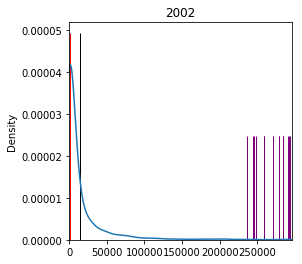



-------------------- 2003 Basic Stats Summary --------------------
2003 total release value: 48812535.62
2003 mean release value: 13942.46
2003 median release value: 1153.00
2003 release variance: 1118890418.01
2003 Skew Value: 4.48
2003 Kurtosis Value: 24.92


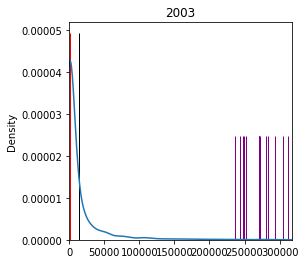



-------------------- 2004 Basic Stats Summary --------------------
2004 total release value: 45542256.91
2004 mean release value: 13775.64
2004 median release value: 873.12
2004 release variance: 1248481526.73
2004 Skew Value: 4.81
2004 Kurtosis Value: 28.47


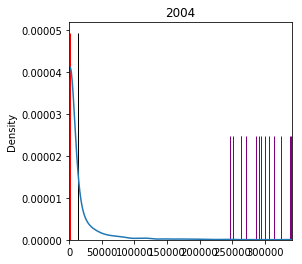



-------------------- 2005 Basic Stats Summary --------------------
2005 total release value: 42339334.02
2005 mean release value: 13132.55
2005 median release value: 755.50
2005 release variance: 1095793271.04
2005 Skew Value: 4.48
2005 Kurtosis Value: 24.38


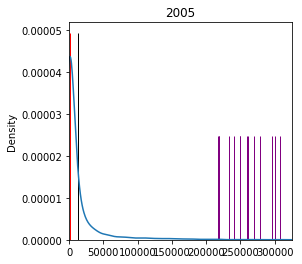



-------------------- 2006 Basic Stats Summary --------------------
2006 total release value: 39881769.54
2006 mean release value: 12672.95
2006 median release value: 704.00
2006 release variance: 1017608608.75
2006 Skew Value: 4.35
2006 Kurtosis Value: 22.23


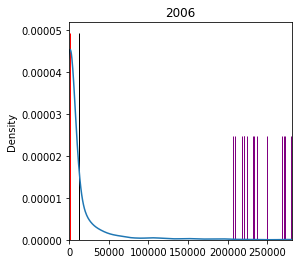



-------------------- 2007 Basic Stats Summary --------------------
2007 total release value: 34272248.24
2007 mean release value: 11657.23
2007 median release value: 726.90
2007 release variance: 909349359.47
2007 Skew Value: 4.74
2007 Kurtosis Value: 27.23


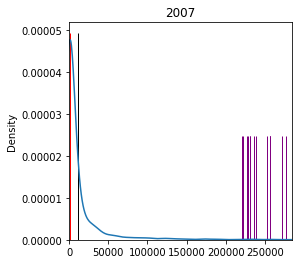



-------------------- 2008 Basic Stats Summary --------------------
2008 total release value: 29747801.65
2008 mean release value: 10560.10
2008 median release value: 663.30
2008 release variance: 781309074.07
2008 Skew Value: 4.91
2008 Kurtosis Value: 29.44


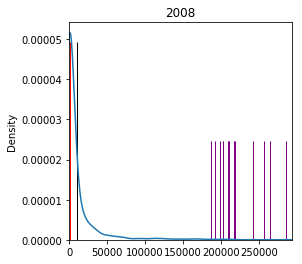



-------------------- 2009 Basic Stats Summary --------------------
2009 total release value: 23194462.54
2009 mean release value: 8903.82
2009 median release value: 523.00
2009 release variance: 556906300.47
2009 Skew Value: 5.05
2009 Kurtosis Value: 32.50


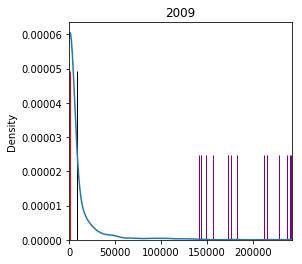



-------------------- 2010 Basic Stats Summary --------------------
2010 total release value: 25404646.08
2010 mean release value: 9885.08
2010 median release value: 620.05
2010 release variance: 713612802.91
2010 Skew Value: 5.10
2010 Kurtosis Value: 31.70


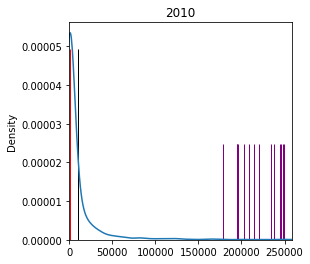



-------------------- 2011 Basic Stats Summary --------------------
2011 total release value: 26297472.28
2011 mean release value: 10232.48
2011 median release value: 546.00
2011 release variance: 751773612.24
2011 Skew Value: 4.90
2011 Kurtosis Value: 28.95


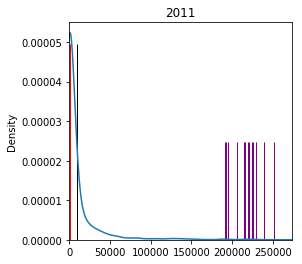



-------------------- 2012 Basic Stats Summary --------------------
2012 total release value: 28285788.86
2012 mean release value: 11149.31
2012 median release value: 750.00
2012 release variance: 890190566.40
2012 Skew Value: 4.96
2012 Kurtosis Value: 30.01


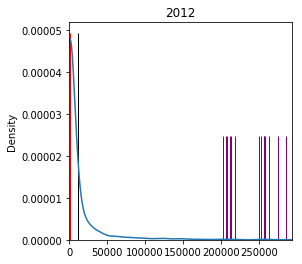



-------------------- 2013 Basic Stats Summary --------------------
2013 total release value: 28757817.57
2013 mean release value: 11286.43
2013 median release value: 715.11
2013 release variance: 936729108.62
2013 Skew Value: 4.88
2013 Kurtosis Value: 28.51


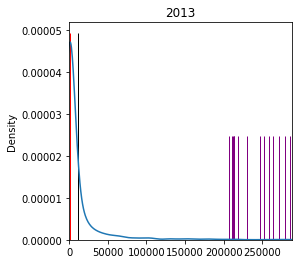



-------------------- 2014 Basic Stats Summary --------------------
2014 total release value: 34598979.06
2014 mean release value: 13784.45
2014 median release value: 749.49
2014 release variance: 1689040916.52
2014 Skew Value: 5.88
2014 Kurtosis Value: 43.79


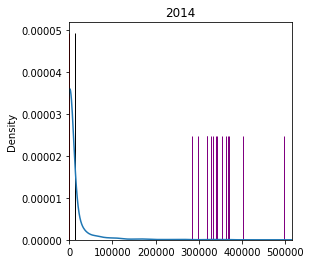



-------------------- 2015 Basic Stats Summary --------------------
2015 total release value: 28228099.03
2015 mean release value: 11616.50
2015 median release value: 712.83
2015 release variance: 1009142499.58
2015 Skew Value: 5.02
2015 Kurtosis Value: 30.62


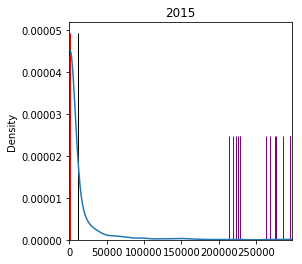



-------------------- 2016 Basic Stats Summary --------------------
2016 total release value: 26542364.23
2016 mean release value: 11333.20
2016 median release value: 616.95
2016 release variance: 907516324.11
2016 Skew Value: 4.77
2016 Kurtosis Value: 27.89


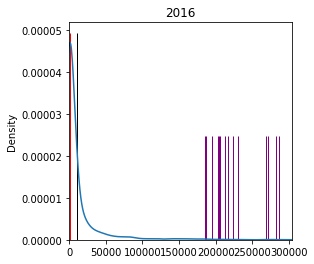

In [139]:
def basicStatsSummary(startYear, endYear):
    year_df_array = []
    
    for year in range(startYear, endYear+1):
        year_df = pd.read_csv('./A4_TRI_Data/A4_TRI_%s_US.csv' % year).drop('Unnamed: 0', axis=1)[['YEAR','TOTAL_RELEASES']]
        year_df = year_df[np.abs(year_df.TOTAL_RELEASES-year_df.TOTAL_RELEASES.mean())<=(3*year_df.TOTAL_RELEASES.std())]
        year_df_array.append({'year': year, 'df': year_df.TOTAL_RELEASES})
    
    for i in range(len(year_df_array)):
        year = year_df_array[i]['year']
        year_df_releases = year_df_array[i]['df']
        print '\n\n-------------------- %s Basic Stats Summary --------------------' % year
        print '%s total release value: %.2f' % (year, year_df_releases.sum())
        year_df_array[i]['total'] = year_df_releases.sum()
        print '%s mean release value: %.2f' % (year, year_df_releases.mean())
        year_df_array[i]['mean'] = year_df_releases.mean()
        print '%s median release value: %.2f' % (year, year_df_releases.median())
        year_df_array[i]['median'] = year_df_releases.median()
        print '%s release variance: %.2f' % (year, year_df_releases.var())
        year_df_array[i]['variance'] = year_df_releases.var()
        print '%s Skew Value: %.2f' % (year, year_df_releases.skew())
        year_df_array[i]['skew'] = year_df_releases.skew()
        print '%s Kurtosis Value: %.2f' % (year, year_df_releases.kurtosis())
        year_df_array[i]['kurtosis'] = year_df_releases.kurtosis()
        
        #looking at the top 15 contributors
        top = [x for x in year_df_releases.sort_values(ascending=False)[0:15]]

        year_df_releases.plot(kind="kde", figsize=(4,4), xlim=(0,year_df_releases.max()), title=year)
        plt.vlines(year_df_releases.mean(),
                   ymin=0, 
                   ymax=ymax,
                   linewidth=1.0)

        plt.vlines(year_df_releases.median(),
                   ymin=0, 
                   ymax=ymax,
                   linewidth=1.0,
                   color='red')

        for i in range(len(top)):
            plt.vlines(top[i],
                   ymin=0, 
                   ymax=ymax/2,
                   linewidth=1.0,
                   color='purple')


        plt.gca().set_ylim(0)
        plt.show()
        
    return year_df_array
   
#apply previous methods to all years 1987-2016 and return so we can look at changes in stats over the period
year_df_objs = basicStatsSummary(1987,2016)

### Overall Similar Outlier Trend
Scrolling through the graphs of all the years 1987-2016 reveals the same general trend each year, where we see that the top 15 or so facilities in this industry sector, Plastics and Rubber, are responsible for nearly all of the releases. To get a better idea of  the trends from year-to-year over this period, let's create a summary data frame.

In [141]:
yearlist = [year_df_objs[i]['year'] for i in range(len(year_df_objs))]
totals = [year_df_objs[i]['total'] for i in range(len(year_df_objs))] 
means = [year_df_objs[i]['mean'] for i in range(len(year_df_objs))] 
medians = [year_df_objs[i]['median'] for i in range(len(year_df_objs))]
variance = [year_df_objs[i]['variance'] for i in range(len(year_df_objs))]
skews = [year_df_objs[i]['skew'] for i in range(len(year_df_objs))]
kurts = [year_df_objs[i]['kurtosis'] for i in range(len(year_df_objs))]

summary = pd.DataFrame({
    'Year': yearlist,
    'Total': totals,
    'Mean': means,
    'Median': medians,
    'Variance': variance,
    'Skew': skews,
    'Kurtosis': kurts
})

In [142]:
def plotSummaryAttr(col):
    summary[col].plot(kind='kde', title=('Distribution of %s 1987-2016' % col), xlim=(summary[col].min(),summary[col].max()))
    ymax = max(plt.gca().get_ylim())
    plt.vlines(summary[col].mean(),
               ymin=0, 
               ymax=ymax,
               linewidth=2.0)

    plt.vlines(summary[col].median(),
               ymin=0, 
               ymax=ymax,
               linewidth=2.0,
               color='red')
    
    plt.gca().set_ylim(0)
    plt.show()

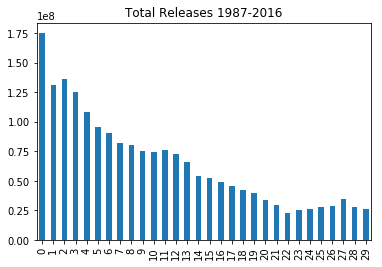

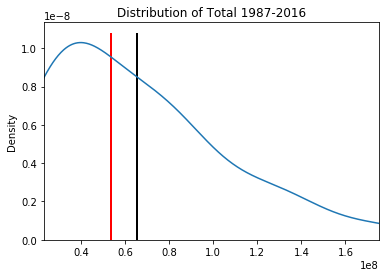

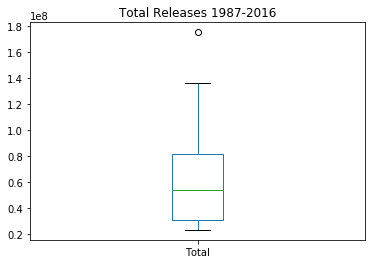

In [143]:
summary['Total'].plot(kind='bar', title='Total Releases 1987-2016')
plt.show()
plotSummaryAttr('Total')
summary['Total'].plot(kind='box', title='Total Releases 1987-2016')
plt.show()

Total releases for this time period fall steadily, appearing to fall nearly linearly until 2009 and then levelling off.

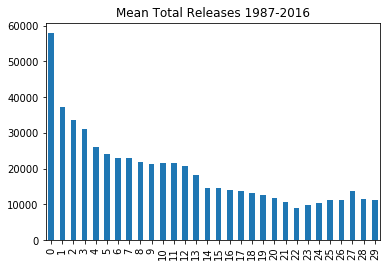

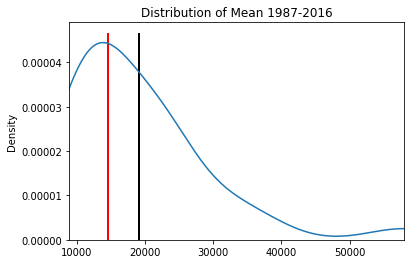

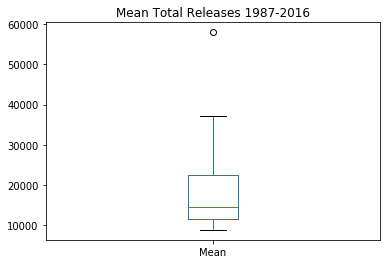

In [144]:
summary['Mean'].plot(kind='bar', title='Mean Total Releases 1987-2016')
plt.show()
plotSummaryAttr('Mean')
summary['Mean'].plot(kind='box', title='Mean Total Releases 1987-2016')
plt.show()

From these plots, we see that the overall mean values have been decresing over the time perod, however the period from 2001-2016 has remained relatively flat, with the largest decrease in releases happening between 1987-1988.

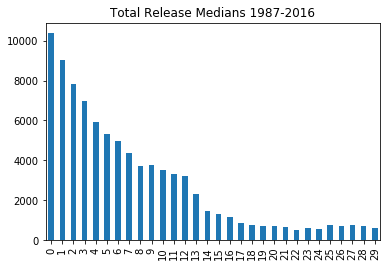

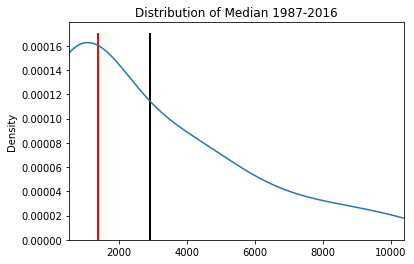

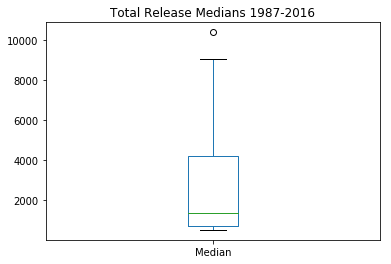

In [145]:
summary['Median'].plot(kind='bar', title='Total Release Medians 1987-2016')
plt.show()
plotSummaryAttr('Median')
summary['Median'].plot(kind='box', title='Total Release Medians 1987-2016')
plt.show()

Again, we see the median values also falling over the time period, with a fast dropoff at first, and a fairly level value during the 2000s. It is also clear that, since we have already seen how heavily skewed this data is due to outliers, something happened in the late 90s and early 2000s that suggests a consolidation of heavy outputs from the top-releasing facilities.

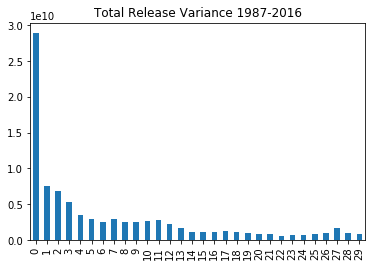

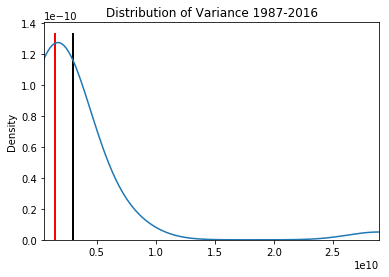

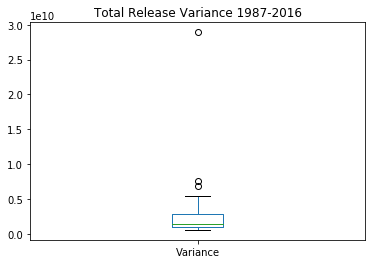

In [146]:
summary['Variance'].plot(kind='bar', title='Total Release Variance 1987-2016')
plt.show()
plotSummaryAttr('Variance')
summary['Variance'].plot(kind='box', title='Total Release Variance 1987-2016')
plt.show()

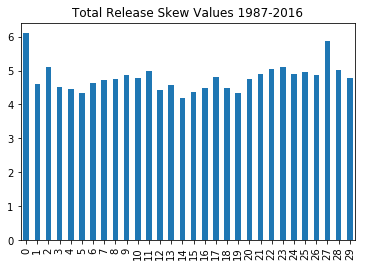

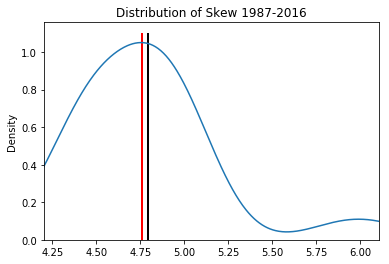

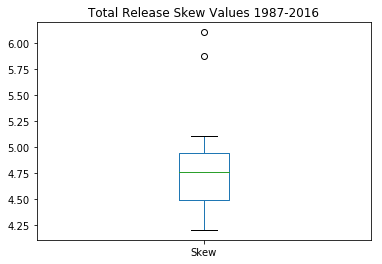

In [147]:
summary['Skew'].plot(kind='bar', title='Total Release Skew Values 1987-2016')
plt.show()
plotSummaryAttr('Skew')
summary['Skew'].plot(kind='box', title='Total Release Skew Values 1987-2016')
plt.show()

To me, the change in the skew values is very striking. There is a large dropoff from 1987 to 1988, and then a general upward trend in the skew from 1988 to 2014, and recently a dip in that value. This strengthens the observation that the release quantity each year is not only being heavily skewed toward a few high-releasing outliers, but also that the general trend in that regard is for those outliers to move even further out. Interesting!

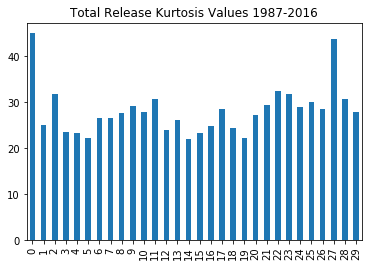

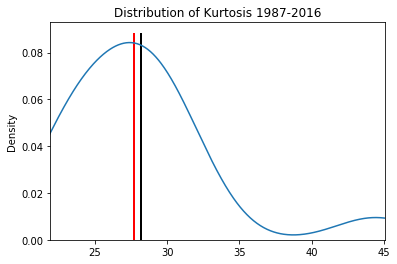

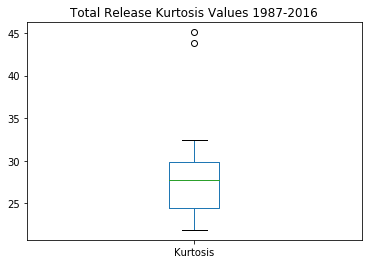

In [148]:
summary['Kurtosis'].plot(kind='bar', title='Total Release Kurtosis Values 1987-2016')
plt.show()
plotSummaryAttr('Kurtosis')
summary['Kurtosis'].plot(kind='box', title='Total Release Kurtosis Values 1987-2016')
plt.show()

The trend in kurtosis values supports our previous observations, and highlights the fact that more facilities are clustering around the relatively low mean and median values in recent years, while outliers dominate overall releases.

## Part 2
In looking at the data so far, it appears that a Gamma or exponential distribution might have the best fit, so let's calculate the alpha and beta values for the method of moments, and try that out.

In [156]:
#we already have the mean and variance values
alpha = summary['Mean']** 2/summary['Variance']
beta = summary['Variance']/summary['Mean']

In [157]:
#start by analyzing 2016 data
us1987 = pd.read_csv('./A4_TRI_Data/A4_TRI_2016_US.csv').drop('Unnamed: 0', axis=1)['TOTAL_RELEASES']
us1987 = us1987[np.abs(us1987-us1987.mean())<=(3*us1987.std())]

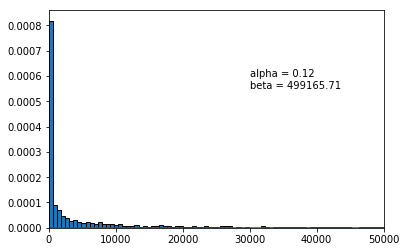

In [166]:
us1987.hist(normed = True, bins=500, ec='black',grid=False)
label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha[0], beta[0])
plt.annotate(label, xy=(30000, 0.00055))
plt.gca().set_xlim(0,50000)
plt.plot(np.linspace(0, 50000), scipy.stats.distributions.gamma.pdf(np.linspace(0, 50000), alpha[0], beta[0]),color='red')
plt.show()

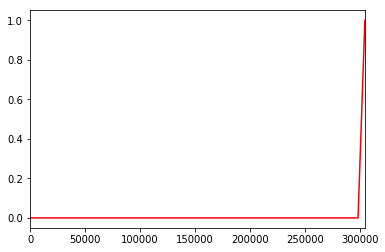

In [167]:
plt.gca().set_xlim(0,us1987.max())
plt.plot(np.linspace(0, us1987.max()), scipy.stats.distributions.gamma.cdf(np.linspace(0, us1987.max()), alpha[0], 300000),color='red')
plt.show()

Given the ridiculously imbalanced nature of the data, in terms of relatively few points contributing so much to the overall releases (10-15 out of several thousand, with around four contributing most of the weight), I can't seem to get a good visualization. The gamma pdf estimate is essentially a flat line, and the cdf is nearly zero with a nearly vertical peak at the end (shown above is the correct alpha value, but I've scaled back the beta value to get a feel for what that number is doing as it grows, which appears to be becoming more vertical and moving to the right). I get the concept here, I just think something is not connecting with the plt code.

## Part 3
To formulate a hypothesis, we will look at the population mean of all US releases from 2000-2009 and the mean of NC releases during the same time period, using a One-Sample T-Test.

In [168]:
nc_00to09total = 0
nc_00to09vals = []
for year in range(2000, 2010):
    year_df = pd.read_csv('./A4_TRI_Data/TRI_%s_NC_CLEAN.csv' % year)[['YEAR','TOTAL_RELEASES']]
    nc_00to09total += year_df.TOTAL_RELEASES.mean()
    nc_00to09vals.append(year_df.TOTAL_RELEASES.values)
    
nc_00to_09mean = nc_00to09total/10

us_00to09total = 0

for year in range(2000, 2010):
    year_df = pd.read_csv('./A4_TRI_Data/A4_TRI_%s_US.csv' % year)[['YEAR','TOTAL_RELEASES']]
    us_00to09total += year_df.TOTAL_RELEASES.mean()
    
us_00to_09mean = us_00to09total/10

In [169]:
us_00to_09mean

20521.120798322856

In [170]:
nc_00to_09mean

44605.139362876223

In [191]:
us2015 = pd.read_csv('./A4_TRI_Data/A4_TRI_2015_US.csv')
us2015 = us2015[np.abs(us2015.TOTAL_RELEASES-us2015.TOTAL_RELEASES.mean())<=(3*us2015.TOTAL_RELEASES.std())]
us2015 = us2015[np.abs(us2015.RECYCLED_TOTAL-us2015.RECYCLED_TOTAL.mean())<=(3*us2015.RECYCLED_TOTAL.std())]

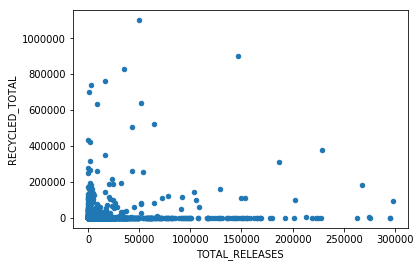

In [194]:
us2015.plot(kind='scatter', x='TOTAL_RELEASES', y='RECYCLED_TOTAL')
plt.show()

In [197]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='TOTAL_RELEASES ~ RECYCLED_TOTAL', data=us2015).fit()

# print the coefficients
lm.params

Intercept         10529.532986
RECYCLED_TOTAL        0.072298
dtype: float64

In [198]:
# create a DataFrame with the minimum and maximum values of recycled total
X_new = pd.DataFrame({'RECYCLED_TOTAL': [us2015.RECYCLED_TOTAL.min(), us2015.RECYCLED_TOTAL.max()]})

,RECYCLED_TOTAL
0,0.0
1,1100000.0


In [199]:
preds = lm.predict(X_new)
preds

0    10529.532986
1    90056.980751
dtype: float64

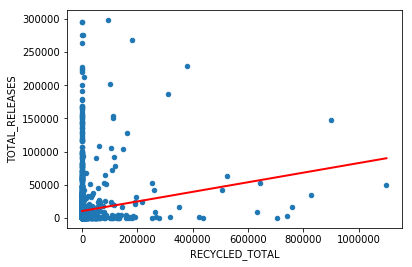

In [202]:
# plot data and least squares line
us2015.plot(kind='scatter', x='RECYCLED_TOTAL', y='TOTAL_RELEASES')
plt.plot(X_new, preds, c='red', linewidth=2)

plt.show()